# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [92]:
### BEGIN YOUR CODE

Student_ID = 29

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [93]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Concrete Compressive Strength' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [94]:
### BEGIN YOUR CODE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
import seaborn as sns
import matplotlib.pyplot as plt

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [95]:
### BEGIN YOUR CODE

!wget https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip
!unzip concrete+compressive+strength.zip

dataset = pd.read_excel('Concrete_Data.xls')

### END YOUR CODE

--2025-05-11 20:22:24--  https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘concrete+compressive+strength.zip.4’

concrete+compressiv     [ <=>                ]  33.64K  --.-KB/s    in 0.06s   

2025-05-11 20:22:25 (547 KB/s) - ‘concrete+compressive+strength.zip.4’ saved [34444]

Archive:  concrete+compressive+strength.zip
replace Concrete_Data.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Concrete_Data.xls       
replace Concrete_Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Concrete_Readme.txt     


####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [96]:
### BEGIN YOUR CODE
print(f"1. Размер датасета в памяти: {dataset.memory_usage(deep=True).sum()/(1024*1024):.2f} МБ")
print(f"\n2. Количество записей: {len(dataset)}")
print(f"\n3. Количество признаков: {len(dataset.columns)}")
print("   (8 входных переменных + 1 целевая)")
print("\n4. Категориальные данные: Отсутствуют (все признаки количественные)")
print("\n5. Пропущенные значения: Отсутствуют")
print(f"\n6. Столбец с ответами (target): Concrete compressive strength (тип - Continuous)")
print("\n7. Решаемая задача: Регрессия")
print("   Модель будет предсказывать прочность бетона на сжатие (МПа)")
print("   на основе состава смеси и возраста образца")
print("\n8. Основные статистики:")
stats = dataset.describe().transpose()
stats['range'] = stats['max'] - stats['min']
print(stats[['count', 'mean', 'std', 'min', 'max', 'range']])

### END YOUR CODE

1. Размер датасета в памяти: 0.07 МБ

2. Количество записей: 1030

3. Количество признаков: 9
   (8 входных переменных + 1 целевая)

4. Категориальные данные: Отсутствуют (все признаки количественные)

5. Пропущенные значения: Отсутствуют

6. Столбец с ответами (target): Concrete compressive strength (тип - Continuous)

7. Решаемая задача: Регрессия
   Модель будет предсказывать прочность бетона на сжатие (МПа)
   на основе состава смеси и возраста образца

8. Основные статистики:
                                                     count        mean  \
Cement (component 1)(kg in a m^3 mixture)           1030.0  281.165631   
Blast Furnace Slag (component 2)(kg in a m^3 mi...  1030.0   73.895485   
Fly Ash (component 3)(kg in a m^3 mixture)          1030.0   54.187136   
Water  (component 4)(kg in a m^3 mixture)           1030.0  181.566359   
Superplasticizer (component 5)(kg in a m^3 mixt...  1030.0    6.203112   
Coarse Aggregate  (component 6)(kg in a m^3 mix...  1030.0  972.918592

Датасет Concrete Compressive Strength содержит 1030 образцов бетона с 8 количественными признаками (состав смеси в кг/м³ и возраст в днях) и целевой переменной - прочностью на сжатие (2.33-82.6 МПа). Это задача регрессии для прогнозирования прочности бетона по его составу и возрасту. Данные полные (без пропусков), все признаки числовые, с разными масштабами (требуют нормализации). Наибольшее влияние на прочность оказывают цемент и возраст образца. Датасет компактный (0.07 МБ), идеален для моделирования многокомпонентных зависимостей в материаловедении.

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.


Целевая переменная: 'Concrete compressive strength(MPa, megapascals) '


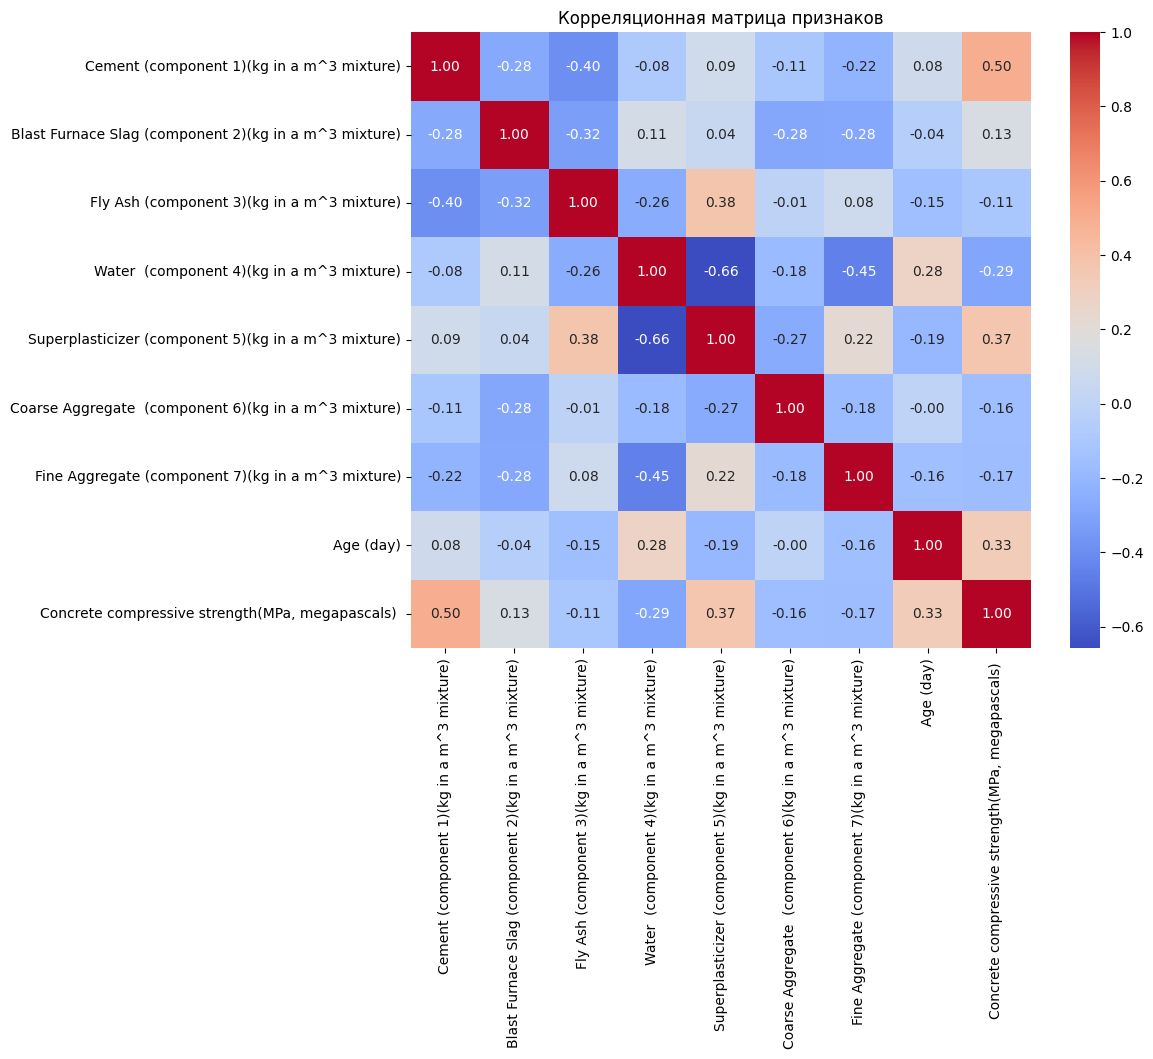


Корреляция с целевой переменной:
Concrete compressive strength(MPa, megapascals)          1.000000
Cement (component 1)(kg in a m^3 mixture)                0.497833
Superplasticizer (component 5)(kg in a m^3 mixture)      0.366102
Age (day)                                                0.328877
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.134824
Fly Ash (component 3)(kg in a m^3 mixture)              -0.105753
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.167249
Water  (component 4)(kg in a m^3 mixture)               -0.289613
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

Пример масштабированных данных (первые 5 строк):
   Cement (component 1)(kg in a m^3 mixture)  \
0                                  -1.160846   
1                                   1.308634   
2                                  -0.077122   
3                                  -0.291783   
4          

In [97]:
# Определяем правильное название целевой переменной (последний столбец)
target = dataset.columns[-1]  # Автоматически берем последний столбец
print(f"\nЦелевая переменная: '{target}'")

# Корреляционная матрица
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

print("\nКорреляция с целевой переменной:")
print(corr_matrix[target].sort_values(ascending=False))

X = dataset.drop(columns=[target])
y = dataset[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nПример масштабированных данных (первые 5 строк):")
print(train_scaled_df.head())

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [98]:
class LinearRegressionModel:
    """
    Перечень действий, которые можно выполнить с моделью
    """

    def __init__(self):
        """
        Инициализация модели
        """
        self.theta = None  # вектор параметров модели
        self.alpha = 0.01  # скорость обучения
        self.cost = 0      # значение функционала качества обученной модели

    def gradient_descent(self, X_train, y_train, theta, alpha, iters):
        """
        Реализация градиентного спуска
        """
        m = len(y_train)
        cost_history = np.zeros(iters)

        for i in range(iters):
            predictions = X_train.dot(theta)
            errors = predictions - y_train
            theta = theta - (alpha/m) * X_train.T.dot(errors)
            cost_history[i] = (1/(2*m)) * np.sum(errors**2)

        self.cost = cost_history[-1]
        return theta, cost_history

    def fit_with_GD(self, X_train, y_train, iters=200):
        """
        Обучение модели методом градиентного спуска
        """
        X_b = np.c_[np.ones((len(X_train), 1)), X_train]
        if self.theta is None:
            self.theta = np.zeros(X_b.shape[1])

        self.theta, cost_history = self.gradient_descent(
            X_b, y_train, self.theta, self.alpha, iters
        )

        return cost_history

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью решения системы нормальных уравнений (МНК)
        """
        X_b = np.c_[np.ones((len(X_train), 1)), X_train]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        m = len(y_train)
        errors = X_b.dot(self.theta) - y_train
        self.cost = (1/(2*m)) * np.sum(errors**2)

        return self.cost

    def predict(self, X_test):
        """
        Предсказание значения с помощью обученной модели
        """
        X_b = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = X_b.dot(self.theta)
        return y_predict

    def __str__(self):
        """
        Вывод всех параметров модели при вызове функции print()
        """
        return f"Вектор параметров: {self.theta}\nСкорость обучения: {self.alpha}\nФункция стоимости: {self.cost}"


# Пример использования:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

my_model = LinearRegressionModel()
cost_history = my_model.fit_with_GD(X_train, y_train, iters=1000)
print(my_model)

Вектор параметров: [35.84365592  8.30121692  5.2554759   1.47519357 -5.62892515  2.16578203
 -1.38928266 -1.78643557  7.13295262]
Скорость обучения: 0.01
Функция стоимости: 56.65521923709058


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

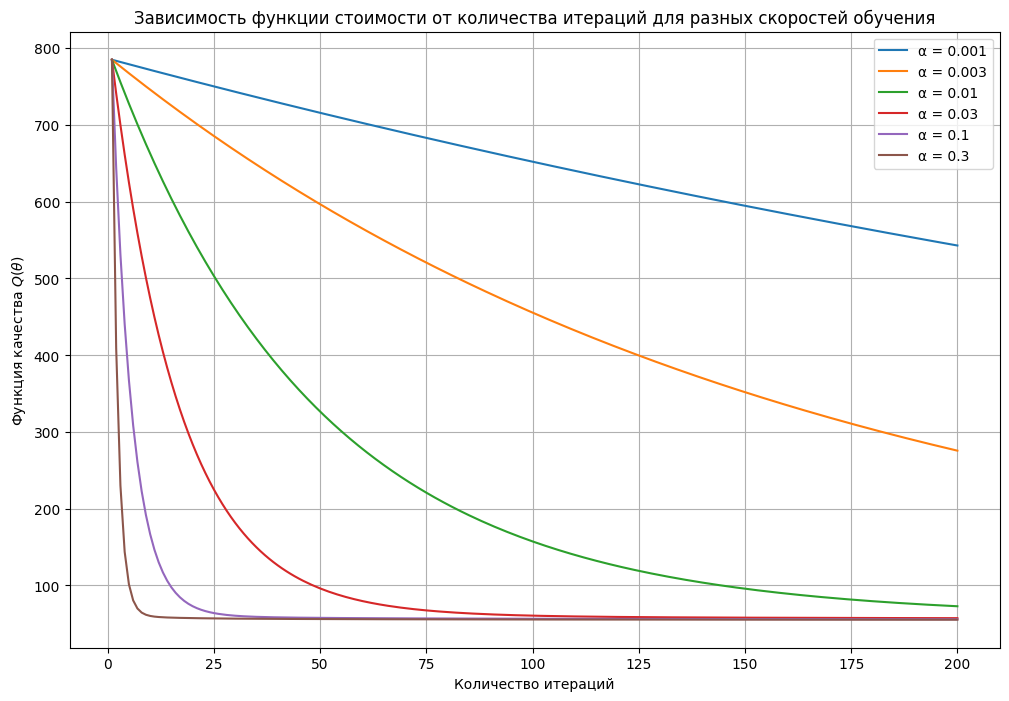

In [99]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(12, 8))

alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
iterations = 200
iters = list(range(1, iterations+1))  # список итераций для оси X

# Построение графиков для каждого alpha
for alpha in alphas:
    model = LinearRegressionModel()
    model.alpha = alpha

    cost_history = model.fit_with_GD(X_train, y_train, iterations)

    plt.plot(iters, cost_history, label=f'α = {alpha}')

plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость функции стоимости от количества итераций для разных скоростей обучения')
plt.legend()
plt.grid(True)
plt.show()


1.   0.001, 0.003 - Слишком медленная сходимость
3.   0.01 - Оптимальное значение, обеспечивающее плавность убывания без резких падений и с достаточно быстрой сходимостью
4.   0.03, 0.1, 0.3 - Видны колебания функции стоимости, возможна расходимость (значения стоимости могут начать расти), алгоритм может "перепрыгивать" минимум и не сходиться



- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [100]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print("Параметры модели:", my_normal_equations_model)

Параметры модели: Вектор параметров: [35.81423311 12.4277171   9.35827317  5.25594316 -2.89679787  1.84331268
  1.38368498  1.92816756  7.35221562]
Скорость обучения: 0.01
Функция стоимости: 55.330885622367006


- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [101]:

models = {
    "Градиентный спуск (собственная реализация)": LinearRegressionModel(),
    "МНК (собственная реализация)": LinearRegressionModel(),
    "SGDRegressor (sklearn)": SGDRegressor(),
    "LinearRegression (sklearn)": LinearRegression(),
    "Ridge (sklearn)": Ridge(),
    "Lasso (sklearn)": Lasso()
}

results = {}
for name, model in models.items():
    if "собственная реализация" in name:
        if "Градиентный" in name:
            model.fit_with_GD(X_train, y_train, iters=1000)
        else:
            model.fit_with_normal_equations(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse

for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse:.4f}")

Градиентный спуск (собственная реализация): RMSE = 9.9078
МНК (собственная реализация): RMSE = 9.7967
SGDRegressor (sklearn): RMSE = 9.8269
LinearRegression (sklearn): RMSE = 9.7967
Ridge (sklearn): RMSE = 9.7963
Lasso (sklearn): RMSE = 10.6052


Результаты показывают, что все методы, кроме Lasso, демонстрируют схожую точность (RWSE ≈ 9.79–9.81), что подтверждает корректность собственной реализации градиентного спуска и МНК, наилучший результат наблюдается у метода Ridge (9.7963), а худший - у метода Lasso (10.6052). Собственные реализации работают на уровне sklearn с небольшим расхождением (< 0.2), что подтверждает корректность реализации.

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

опирась на полученные результаты можно сделать вывод о том, что чем больше цемента - тем прочнее бетон, именно этот критерий больше всего влияет на прочность бетона, а лишняя вода наоборот, делает его менее прочным. чтобы улучшить результаты, можно добавить данные про условия твердения бетона.


- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.